# Regressão 01 - tarefa 01

### 1. Explorando a base de gorjetas

a. Na aula fizemos uma regressão de ```tip``` explicada por ```net_bill```. Carregue os pacotes e a base, crie as variáveis necessárias como na aula, e reproduza esta regressão.

b. Reproduza também o gráfico de dispersão dessas duas variáveis.

In [3]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
import statsmodels.formula.api as smf

In [4]:
# Carregando base de dados
tips = sns.load_dataset('tips')
tips['tip_pct'] =  tips['tip'] / tips['total_bill']
tips['net_bill'] = tips['total_bill'] - tips['tip']
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct,net_bill
0,16.99,1.01,Female,No,Sun,Dinner,2,0.059447,15.98
1,10.34,1.66,Male,No,Sun,Dinner,3,0.160542,8.68
2,21.01,3.50,Male,No,Sun,Dinner,3,0.166587,17.51
3,23.68,3.31,Male,No,Sun,Dinner,2,0.139780,20.37
4,24.59,3.61,Female,No,Sun,Dinner,4,0.146808,20.98


<Axes: xlabel='tip'>

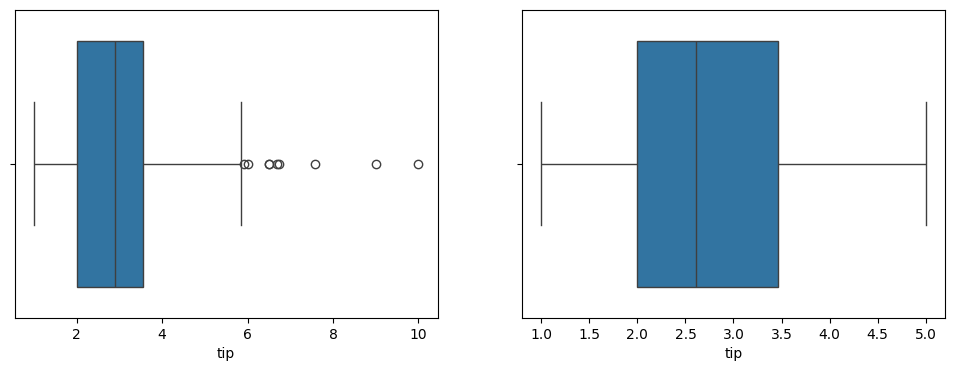

In [5]:
# Visualizando outliers
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))
sns.boxplot(data=tips, x='tip', ax=ax[0])

# Removendo outliers
tips['tip'] = [tip if tip <= 5 else np.nan for tip in tips['tip']]

# Visualizando resultado
sns.boxplot(data=tips, x='tip', ax=ax[1])

In [6]:
# Comparação entre antes e depois
print(tips.shape)
tips.dropna(inplace=True)
print(tips.shape)

(244, 9)
(226, 9)


In [11]:
# Criando modelo de regresão
reg1 = smf.ols('tip ~ net_bill', data=tips).fit()
reg1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.256
Model:                            OLS   Adj. R-squared:                  0.253
Method:                 Least Squares   F-statistic:                     77.03
Date:                Tue, 18 Jun 2024   Prob (F-statistic):           4.37e-16
Time:                        20:11:49   Log-Likelihood:                -286.49
No. Observations:                 226   AIC:                             577.0
Df Residuals:                     224   BIC:                             583.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.6522      0.136     12.119      0.000       1.384       1.921
net_bill       0.0675      0.008      8.777      0.000       0.052       0.083
==============================================================================
Omnibus:                        1.836   Durbin-Watson:                   2.067
Prob(Omnibus):                  0.399   Jarque-Bera (JB):                1.906
Skew:                           0.209   Prob(JB):                        0.386
Kurtosis:                       2.833   Cond. No.                         42.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

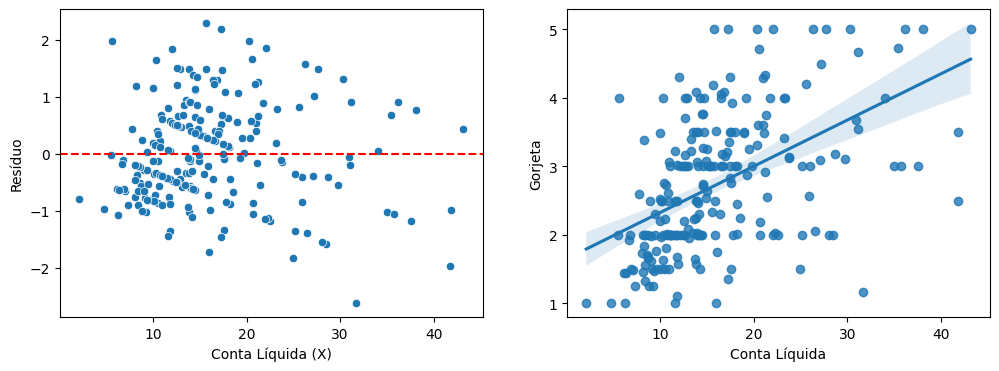

In [8]:
# Criando figura e eixos
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

# Plotando no 1º eixo o gráfico de dispersão de resíduo por variável descritiva
sns.scatterplot(x=tips['net_bill'], y=reg1.resid, ax=axes[0])
axes[0].axhline(y=0, color='r', linestyle='--')
axes[0].set_ylabel('Resíduo')
axes[0].set_xlabel('Conta Líquida (X)')

# Plotando no 2º eixo o gráfico de regressão do modelo
sns.regplot(data=tips, x='net_bill', y='tip', ax=axes[1])
axes[1].set_ylabel('Gorjeta')
axes[1].set_xlabel('Conta Líquida')

plt.show()

### 2. Mudança de perspectiva

Agora ajuste um modelo de regressão de ```tip_pct``` por ```net_bill```. Construa o gráfico de dispersão correspondente.

In [12]:
# Criando um outro modelo de regressão
reg2 = smf.ols('tip_pct ~ net_bill', data=tips).fit()
reg2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                tip_pct   R-squared:                       0.321
Model:                            OLS   Adj. R-squared:                  0.318
Method:                 Least Squares   F-statistic:                     105.9
Date:                Tue, 18 Jun 2024   Prob (F-statistic):           1.37e-20
Time:                        20:11:52   Log-Likelihood:                 401.61
No. Observations:                 226   AIC:                            -799.2
Df Residuals:                     224   BIC:                            -792.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2164      0.006     33.338      0.000       0.204       0.229
net_bill      -0.0038      0.000    -10.292      0.000      -0.004      -0.003
==============================================================================
Omnibus:                       43.728   Durbin-Watson:                   2.060
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              115.014
Skew:                           0.844   Prob(JB):                     1.06e-25
Kurtosis:                       6.060   Cond. No.                         42.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

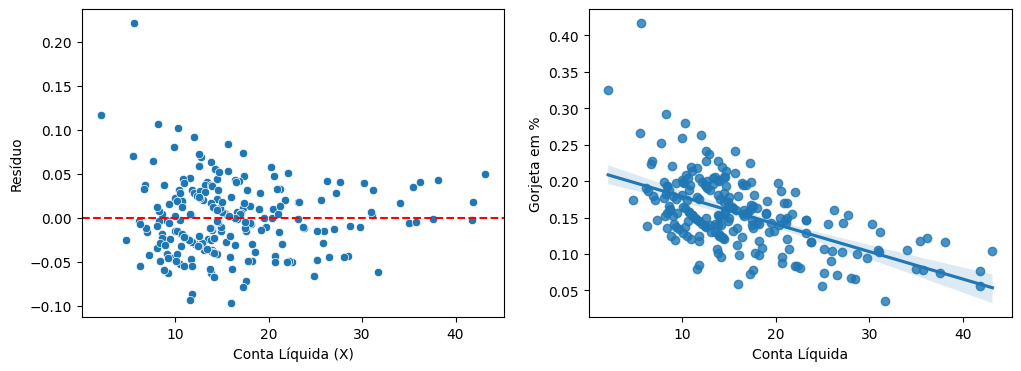

In [10]:
# Criando figura e eixos
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

# Plotando no 1º eixo o gráfico de dispersão de resíduo por variável descritiva
sns.scatterplot(x=tips['net_bill'], y=reg2.resid, ax=axes[0])
axes[0].axhline(y=0, color='r', linestyle='--')
axes[0].set_ylabel('Resíduo')
axes[0].set_xlabel('Conta Líquida (X)')

# Plotando no 2º eixo o gráfico de regressão do modelo
sns.regplot(data=tips, x='net_bill', y='tip_pct', ax=axes[1])
axes[1].set_ylabel('Gorjeta em %')
axes[1].set_xlabel('Conta Líquida')

plt.show()

### 3. Comente

Compare os dois gráficos e comente (de forma objetiva e suscinta) a relação entre eles e a diferença do ajuste. Podemos comparar diretamente os $R^2$s?

A primeira regressão criada tem uma relação positiva, quando maior o valor da variável **tip** maior é o valor da variável **net_bill**, essa relação é oposta quando comparamos **tip_pct** e **net_bill**. Os dois modelos representam relações entre variáveis diferentes, mesmo que partilhem a mesma variável explicativa (**net_bill**) o $R^2$ de um modelo não pode ser comparado diretamente com o de outro, para isso seria necessário que os modelos explicassem a mesma variável dependente, mas como não o fazem, nós não podemos comparar seus coeficientes de determinação.

### 4. Ajuste do modelo em outra escala

Com o modelo no item 3, obtenha a preditiva do valor da gorjeta:
  1. obtenha o valor predito ```pred``` para ```tip_pct``` (dica, veja o atributo ```reg.fittedvalues```)
  2. obtenha o valor predito para ```tip``` como ```tip_pct * net_bill```
  3. calcule o $R^2$ do modelo para ```tip```
  4. compare esse $R^2$ com o do item 1

In [13]:
reg2.fittedvalues

0      0.156189
1      0.183694
2      0.150425
3      0.139649
4      0.137351
         ...   
238    0.098995
240    0.121526
241    0.138519
242    0.155850
243    0.156943
Length: 226, dtype: float64

In [14]:
# Criando um novo modelo
reg3 = smf.ols('tip ~ tip_pct * net_bill', data=tips).fit()
reg3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                 1.832e+04
Date:                Tue, 18 Jun 2024   Prob (F-statistic):          1.48e-265
Time:                        20:17:51   Log-Likelihood:                 303.42
No. Observations:                 226   AIC:                            -598.8
Df Residuals:                     222   BIC:                            -585.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -0.4634      0.029    -15.730      0.000      -0.521      -0.405
tip_pct              3.1512      0.172     18.339      0.000       2.813       3.490
net_bill            -0.0019      0.001     -1.339      0.182      -0.005       0.001
tip_pct:net_bill     1.1942      0.011    106.773      0.000       1.172       1.216
==============================================================================
Omnibus:                       78.046   Durbin-Watson:                   2.059
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1068.795
Skew:                           0.899   Prob(JB):                    8.20e-233
Kurtosis:                      13.501   Cond. No.                         735.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [15]:
reg3.fittedvalues

0      0.827332
1      1.689784
2      3.510978
3      3.337803
4      3.636651
         ...   
238    4.736832
240    1.932213
241    1.952150
242    1.699475
243    3.019659
Length: 226, dtype: float64

In [16]:
reg3.rsquared

0.9959779321799467

In [17]:
print(str("""Os parâmetros usados na primeira regressão foram: {}\nO que resultou num R2 igual a: {:.2f}%\n\n
Os parâmetros usados na terceira regressão foram: {}\nO que resultou num R2 igual a: {:.2f}%\n\n
Como é possível observar, existe uma diferença de R2 dos dois modelos igual a {:.2f}%\n""").format(
    reg1.params.index[1:][0],
    reg1.rsquared * 100,
    [reg3.params.index[1:][i] for i in range(0, len(reg3.params.index[1:]))],
    reg3.rsquared * 100,
    (reg3.rsquared * 100) - (reg1.rsquared * 100)
))

Os parâmetros usados na primeira regressão foram: net_bill
O que resultou num R2 igual a: 25.59%


Os parâmetros usados na terceira regressão foram: ['tip_pct', 'net_bill', 'tip_pct:net_bill']
O que resultou num R2 igual a: 99.60%


Como é possível observar, existe uma diferença de R2 dos dois modelos igual a 74.01%

